# 02. Linear Algebra

*Contents*

* [02.00.][0200]
* [02.01. Scalars, Vectors, Matrices and Tensors][0201]
* [02.02. Multiplying Matrices and Vectors][0202]
* [02.03. Identity and Inverse Matrices][0203]
* [02.04. Linear Dependence and Span][0204]
* [02.05. Norms][0205]
* [02.06. Special Kinds of Matricesand Vectors][0206]
* [02.07. Eigendecomposition][0207]
* [02.08. Singular Value Decomposition][0208]
* [02.09. The Moore-Penrose Pseudoinverse][0209]
* [02.10. The Trace Operator][0210]
* [02.11. The Determinant][0211]
* [02.12. Example: Principal Components Analysis][0212]

[0200]: #0200
[0201]: #0201-scalars-vectors-matrices-and-tensors
[0202]: #0202-multiplying-matrices-and-vectors
[0203]: #0203-identity-and-inverse-matrices
[0204]: #0204-linear-dependence-and-span
[0205]: #0205-norms
[0206]: #0206-special-kinds-of-matricesand-vectors
[0207]: #0207-eigendecomposition
[0208]: #0208-singular-value-decomposition
[0209]: #0209-the-moore-penrose-pseudoinverse
[0210]: #0210-the-trace-operator
[0211]: #0211-the_determinant
[0212]: #0212-example-principal-components-analysis

---

In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import sklearn
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
"""{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
sklearn\t\t{}
nltk\t\t{}"""
    .format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, sklearn.__version__, nltk.__version__))

c = {'b': '#1f77b4', 
     'o': '#ff7f0e', 
     'g': '#2ca02c', 
     'r': '#d62728', 
     'v': '#9467bd', 
     'br': '#8c564b', 
     'p': '#e377c2', 
     'gr': '#7f7f7f', 
     'y': '#bcbd22', 
     'c': '#17becf'}

2019-6-1 20:52:34
----------------------
numpy		1.15.2
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
sklearn		0.20.0
nltk		3.2.5


## 02.01. Scalars, Vectors, Matrices and Tensors

- scalars
- vectors
- matrices: $\mathbf{A}$
- tensors: $\mathsf{A}_{i, j, k}$

## 02.02. Multiplying Matrices and Vectors

## 02.03. Identity and Inverse Matrices
## 02.04. Linear Dependence and Span
## 02.05. Norms

## 02.06. Special Kinds of Matricesand Vectors

In [10]:
np.random.seed(123)
v = np.random.randint(9, size=5)
np.diag(v)

array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 3]])

In [30]:
x = np.arange(5)
v = np.arange(6, 11)
diag_v = np.diag(v)

v_odot_x = np.multiply(v, x)
diag_v_x = np.matmul(diag_v, x)
print('v ⊙ x \n=\n{} ⊙ {}\n=\n{}\n'.format(v, x, v_odot_x))
print('diag(v) x \n=\n{}  {}\n=\n{}'.format(diag_v, np.transpose(x), diag_v_x))

v ⊙ x 
=
[ 6  7  8  9 10] ⊙ [0 1 2 3 4]
=
[ 0  7 16 27 40]

diag(v) x 
=
[[ 6  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 10]]  [0 1 2 3 4]
=
[ 0  7 16 27 40]


In [44]:
np.random.seed(321)
v = np.random.randint(9, size=5)
diag_v = np.diag(v)
print('v = \n{}\n'.format(diag_v))

inv_diag_v = np.linalg.inv(diag_v)
print('inv(diag(v)) = \n{}\n'.format(inv_diag_v))

inverse_diag_v = np.diag([1/vi for vi in v])
print('diag([1/v1, ..., 1/vn]) =\n{}'.format(inverse_diag_v))

v = 
[[4 0 0 0 0]
 [0 8 0 0 0]
 [0 0 1 0 0]
 [0 0 0 8 0]
 [0 0 0 0 8]]

inv(diag(v)) = 
[[0.25  0.    0.    0.    0.   ]
 [0.    0.125 0.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.125 0.   ]
 [0.    0.    0.    0.    0.125]]

diag([1/v1, ..., 1/vn]) =
[[0.25  0.    0.    0.    0.   ]
 [0.    0.125 0.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.125 0.   ]
 [0.    0.    0.    0.    0.125]]


In [48]:
from scipy.stats import ortho_group

A = ortho_group.rvs(dim = 3)
print('A \n=\n{}'.format(A))

np.set_printoptions(suppress=True)
AT_A = np.matmul(A, A.T)
print('AT A \n=\n{}'.format(AT_A))

A 
=
[[-0.25324656 -0.17511549  0.95142038]
 [-0.30893242 -0.91734526 -0.25107454]
 [-0.91674802  0.35750837 -0.17821568]]
AT A 
=
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


## 02.07. Eigendecomposition

X =
[[0.8660254 0.5      ]
 [0.5       0.8660254]]
A =
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
v =
[1.3660254 0.3660254]


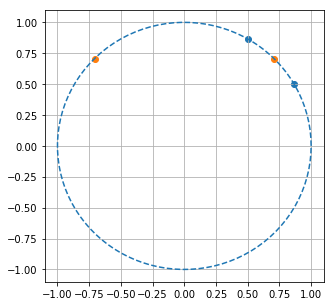

In [86]:
np.random.seed(111)
theta1, theta2 = np.pi/6, np.pi/3
x1, x2 = np.array([np.cos(theta1), np.sin(theta1)]), np.array([np.cos(theta2), np.sin(theta2)])

X = np.stack((x1, x2)).T

# X = np.random.randint(9, size=4).reshape(2,2)
v, A = np.linalg.eig(X)

print('X =\n{}'.format(X))
print('A =\n{}'.format(A))
print('v =\n{}'.format(v))

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[0, 0], X[1, 0], c=c['b'])
ax.scatter(X[0, 1], X[1, 1], c=c['b'])

ax.scatter(A[0, 0], A[1, 0], c=c['o'])
ax.scatter(A[0, 1], A[1, 1], c=c['o'])

thetas = np.linspace(0, np.pi*2, 100)
ax.plot(np.cos(thetas), np.sin(thetas), linestyle='--')
ax.grid(True)
plt.tight_layout
plt.show()

## 02.08. Singular Value Decomposition
## 02.09. The Moore-Penrose Pseudoinverse
## 02.10. The Trace Operator
## 02.11. The Determinant
## 02.12. Example: Principal Components Analysis